In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('adult.data')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1    workclass       48842 non-null  object
 2    fnlwgt          48842 non-null  int64 
 3    education       48842 non-null  object
 4    education-num   48842 non-null  int64 
 5    marital-status  48842 non-null  object
 6    occupation      48842 non-null  object
 7    relationship    48842 non-null  object
 8    race            48842 non-null  object
 9    sex             48842 non-null  object
 10   capital-gain    48842 non-null  int64 
 11   capital-loss    48842 non-null  int64 
 12   hours-per-week  48842 non-null  int64 
 13   native-country  48842 non-null  object
 14   income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df.isnull().sum()

age                0
 workclass         0
 fnlwgt            0
 education         0
 education-num     0
 marital-status    0
 occupation        0
 relationship      0
 race              0
 sex               0
 capital-gain      0
 capital-loss      0
 hours-per-week    0
 native-country    0
 income            0
dtype: int64

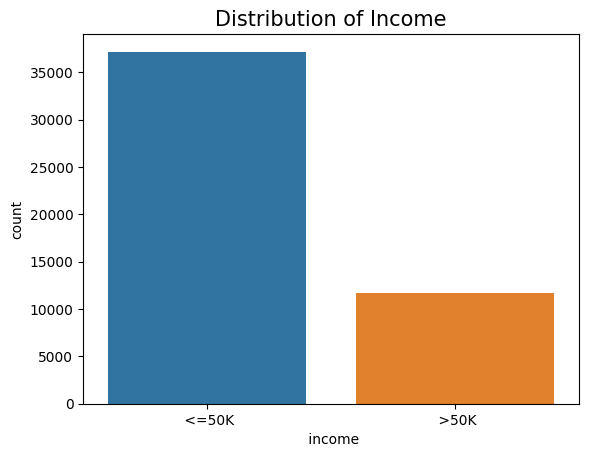

In [ ]:
# Checking label counts
sns.countplot(x=' income', data=df)
plt.title("Distribution of Income", fontsize = 15)
plt.show()

In [ ]:
# Đếm số người có thu nhập >50K
num_high_income = len(df[df[' income'] == ' >50K'])

# Đếm số người có thu nhập <=50K
num_low_income = len(df[df[' income'] == ' <=50K'])

# Tính phần trăm
total_records = len(df)
percentage_high_income = (num_high_income / total_records) * 100
percentage_low_income = (num_low_income / total_records) * 100

print('-> Total No. of records : {}\n'.format(total_records))
print('Percentage of people with income >50K: {:.2f}%'.format(percentage_high_income))
print('Percentage of people with income <=50K: {:.2f}%'.format(percentage_low_income))

-> Total No. of records : 48842

Percentage of people with income >50K: 23.93%
Percentage of people with income <=50K: 76.07%


Ta thấy tập dữ liệu không cân bằng, số người thu nhập dưới 50k là 776.07% và số người thu nhập trên 50k là 23.93% trên tổng số 48842 dòng dữ liệu

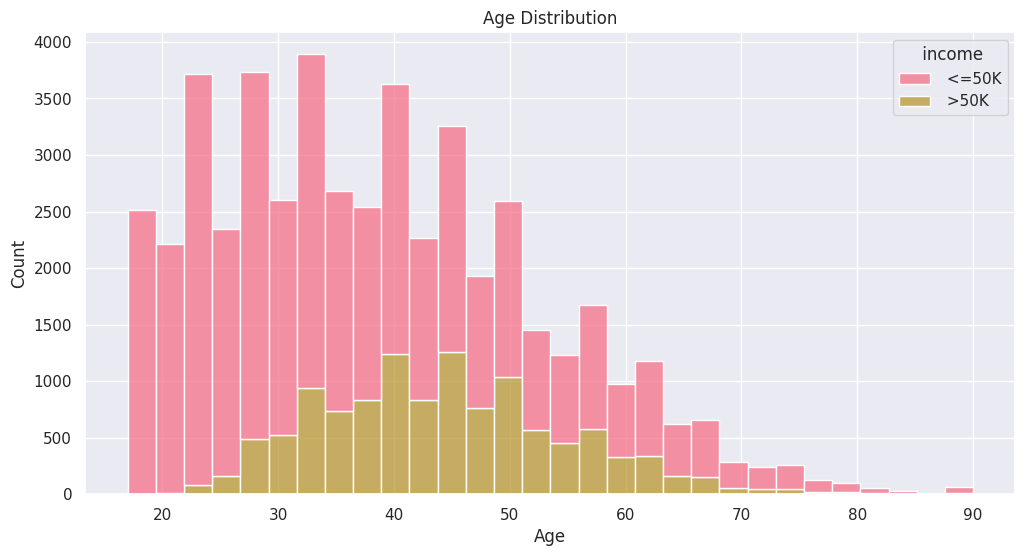

In [14]:
# Age
plt.figure(figsize=(12, 6))
sns.set_theme(style="darkgrid")
sns.set_palette("husl")
sns.histplot(data=df, x='age', hue=' income', bins=30, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

Nhìn vào biểu đồ Ta thấy thu nhập >50K cao hơn là tập trung trong khoảng 40 đến 50 tuổi và từ 40 tuổi trở xuống thì số lượng người có thu nhập <=50k rất lớn

In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Column '{column}' has {len(unique_values)} unique values:")
    print(unique_values)
    print("\n")

Column 'age' has 74 unique values:
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]


Column ' workclass' has 9 unique values:
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column ' fnlwgt' has 28523 unique values:
[ 77516  83311 215646 ... 173449  89686 350977]


Column ' education' has 16 unique values:
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Column ' education-num' has 16 unique values:
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column ' marital-status' has 7 unique values:
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Marrie

In [ ]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [ ]:
df[' workclass'].value_counts()

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1981
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name:  workclass, dtype: int64

In [ ]:
df[' workclass'] = df[' workclass'].replace(' ?', ' Private')

In [ ]:
(df[' occupation'].value_counts() / len(df)) * 100

 Prof-specialty       12.636665
 Craft-repair         12.513820
 Exec-managerial      12.460587
 Adm-clerical         11.488064
 Sales                11.268990
 Other-service        10.079440
 Machine-op-inspct     6.187298
 ?                     5.751198
 Transport-moving      4.821670
 Handlers-cleaners     4.242251
 Farming-fishing       3.050653
 Tech-support          2.960567
 Protective-serv       2.012612
 Priv-house-serv       0.495475
 Armed-Forces          0.030711
Name:  occupation, dtype: float64

In [ ]:
valid_values = df[' occupation'][df[' occupation'] != ' ?'].tolist()
valid_count = len(valid_values)
question_mark_count = df[' occupation'].value_counts().get(' ?', 0)

values_to_add = valid_count - question_mark_count

for i in range(len(df)):
    if df.loc[i, ' occupation'] == ' ?':
        df.loc[i, ' occupation'] = valid_values[i % values_to_add]

In [ ]:
df[' native-country'].value_counts()

 United-States                 43832
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [ ]:
valid_values_nc = df[' native-country'][df[' native-country'] != ' ?'].tolist()
valid_count_nc = len(valid_values)
question_mark_count_nc = df[' native-country'].value_counts().get(' ?', 0)

values_to_add_nc = valid_count_nc - question_mark_count_nc

for i in range(len(df)):
    if df.loc[i, ' native-country'] == ' ?':
        df.loc[i, ' native-country'] = valid_values_nc[i % values_to_add_nc]

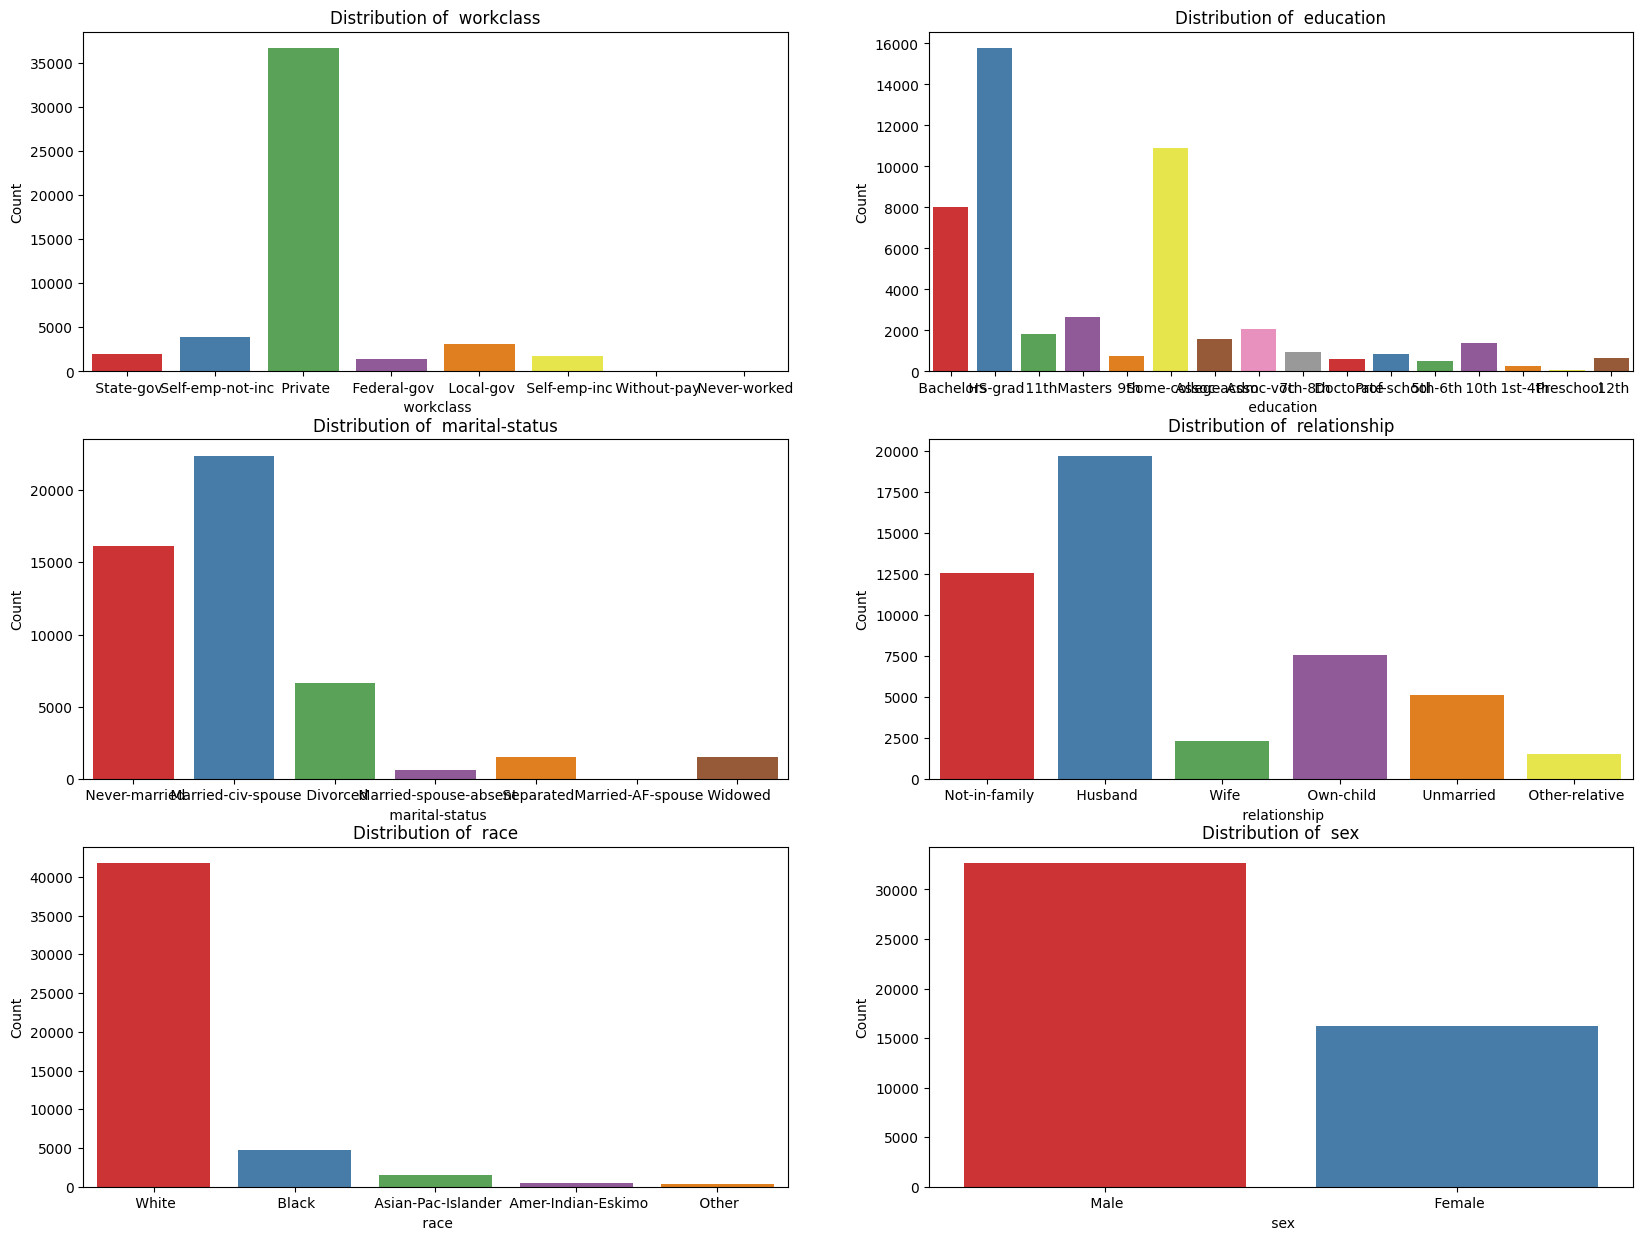

In [ ]:
categorical_attributes = [ ' workclass',' education', ' marital-status', ' relationship', ' race', ' sex']
num_rows_cat = (len(categorical_attributes) - 1) // 2 + 1

# Create subplots for categorical attributes
plt.figure(figsize=(20, 5 * num_rows_cat))
for i, attr in enumerate(categorical_attributes):
    plt.subplot(num_rows_cat, 2, i + 1)
    sns.countplot(data=df, x=attr, palette='Set1')
    plt.xlabel(attr)
    plt.ylabel('Count')
    plt.title(f'Distribution of {attr}')

Thống kê số lượng
1.   Thuộc tính workclass : Private(Tư Nhân) chiếm nhiều nhất
2. Thuộc tính education : Bachelors (Cử Nhân) và HS-grad chiếm nhiều nhất
3. Thuộc tính marital-status : Never-married(chưa kết hôn) và Married-civ-spouse(đã kết hôn) chiếm nhiều nhất
4. Thuộc tính relationship : Husband và Not-in-family chiếm nhiều nhất
5. Thuộc tính race : White(Da trắng) chiếm nhiều nhất
6. Thuộc tính sex : Male chiếm nhiều hơn

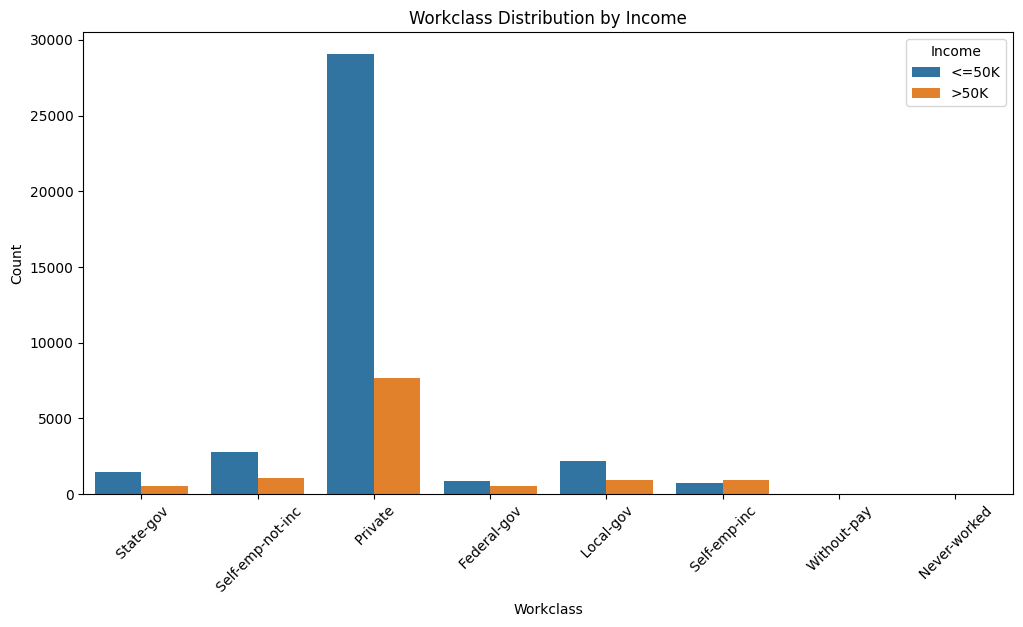

In [ ]:
# Vẽ biểu đồ cột cho cột "Workclass" với phân tách dựa trên cột "income"
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(data=df, x=' workclass', hue=' income')
# Đặt tiêu đề và nhãn trục
plt.title('Workclass Distribution by Income')
plt.xlabel('Workclass')
plt.ylabel('Count')
# Điều chỉnh và đặt chú thích
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
# Hiển thị biểu đồ
plt.show()

Ta thấy trong workclass thì số lượng private(tư nhân) chiếm hầu hết phần lớn

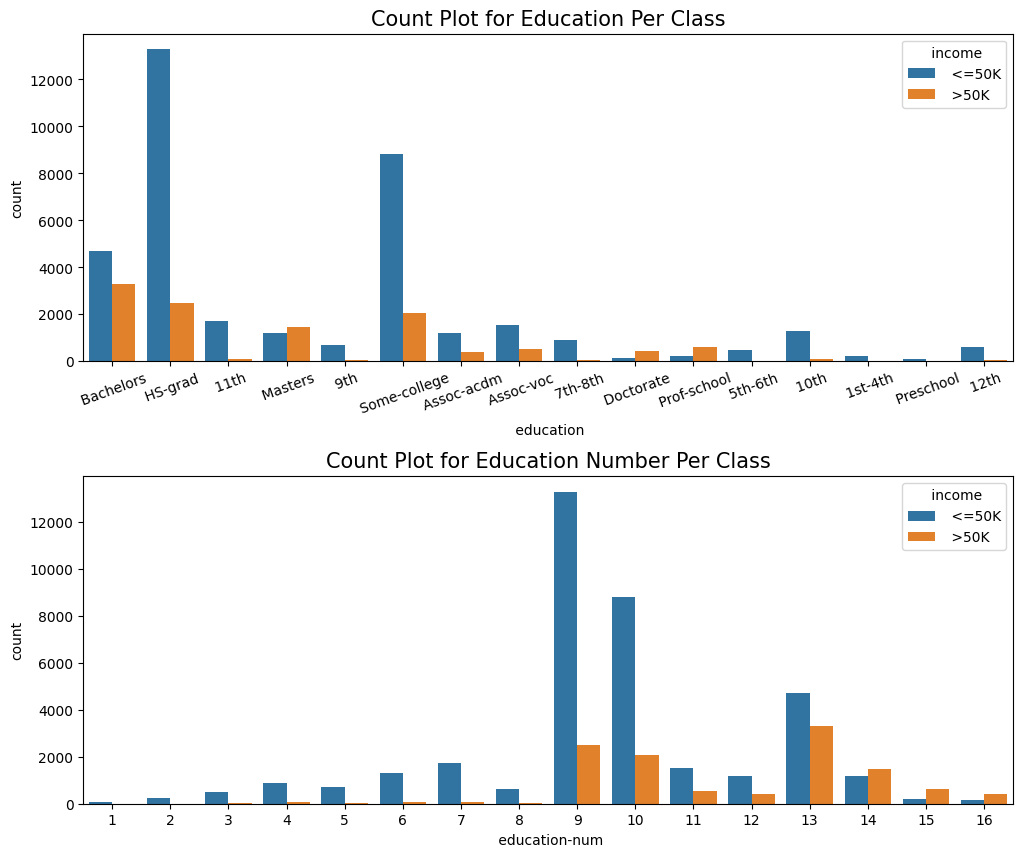

In [ ]:
# Count Plot for Education Per Class
plt.figure(figsize=[12,10])
plt.subplot(2,1,1)
sns.countplot(x=' education', data=df, hue=' income')
plt.xticks(rotation=20)
plt.title("Count Plot for Education Per Class", fontsize = 15)

# Count Plot for Education Number Per Class
plt.subplot(2,1,2)
sns.countplot(x=' education-num', data=df, hue=' income')
plt.title("Count Plot for Education Number Per Class", fontsize = 15)
plt.subplots_adjust(hspace = 0.35)

In [ ]:
education_classes = df[' education'].unique()
for educ_class in education_classes:
    print("{}, the Education Number is {}".
          format(educ_class, df[df[' education'] == educ_class][' education-num'].unique()))

 Bachelors, the Education Number is [13]
 HS-grad, the Education Number is [9]
 11th, the Education Number is [7]
 Masters, the Education Number is [14]
 9th, the Education Number is [5]
 Some-college, the Education Number is [10]
 Assoc-acdm, the Education Number is [12]
 Assoc-voc, the Education Number is [11]
 7th-8th, the Education Number is [4]
 Doctorate, the Education Number is [16]
 Prof-school, the Education Number is [15]
 5th-6th, the Education Number is [3]
 10th, the Education Number is [6]
 1st-4th, the Education Number is [2]
 Preschool, the Education Number is [1]
 12th, the Education Number is [8]


Nhìn vào biểu đồ ta thấy người có trình độ học vấn là Bachelors (Cử Nhân) và HS-grad có thu nhập >50K là nhiều nhất
Some-college(cao đẳng) có thu nhập <=50K là nhiều nhất

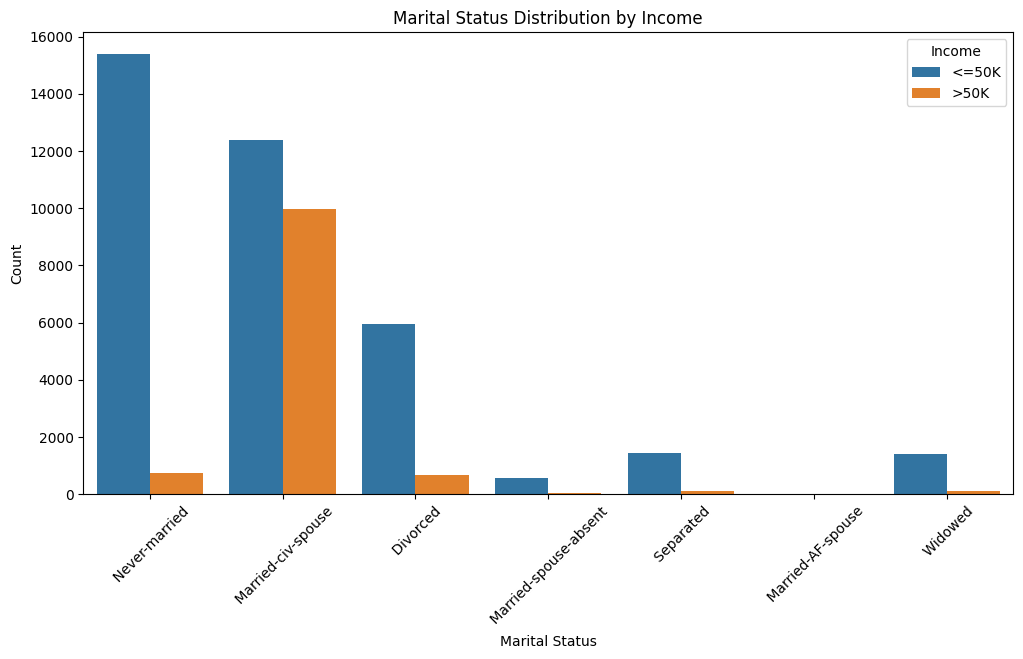


 --Value Counts-- 

 Married-civ-spouse       22379
 Never-married            16117
 Divorced                  6633
 Separated                 1530
 Widowed                   1518
 Married-spouse-absent      628
 Married-AF-spouse           37
Name:  marital-status, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(data=df, x=' marital-status', hue=' income')
# Đặt tiêu đề và nhãn trục
plt.title('Marital Status Distribution by Income')
plt.xlabel('Marital Status')
plt.ylabel('Count')
# Điều chỉnh và đặt chú thích
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
# Hiển thị biểu đồ
plt.show()
print('\n --Value Counts-- \n')
print(df[' marital-status'].value_counts())

Ta thấy người Married-civ-spouse(đã kết hôn) có thu nhập >50K cao nhất

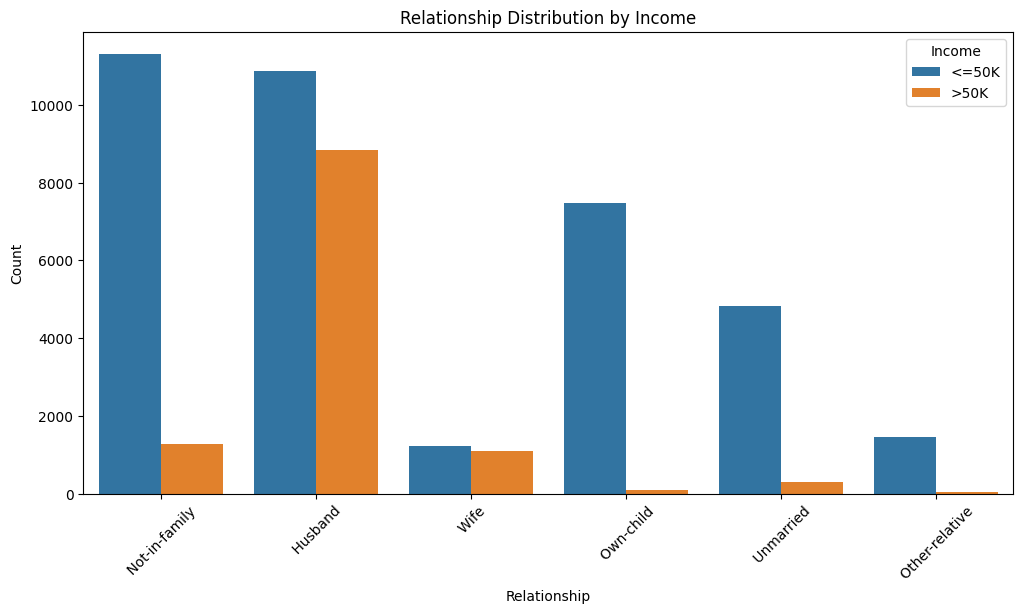


 --Value Counts-- 

 Husband           19716
 Not-in-family     12583
 Own-child          7581
 Unmarried          5125
 Wife               2331
 Other-relative     1506
Name:  relationship, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(data=df, x=' relationship', hue=' income')
# Đặt tiêu đề và nhãn trục
plt.title('Relationship Distribution by Income')
plt.xlabel('Relationship')
plt.ylabel('Count')
# Điều chỉnh và đặt chú thích
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
# Hiển thị biểu đồ
plt.show()
print('\n --Value Counts-- \n')
print(df[' relationship'].value_counts())

Ta thấy người Husband có thu nhập >50K cao nhất

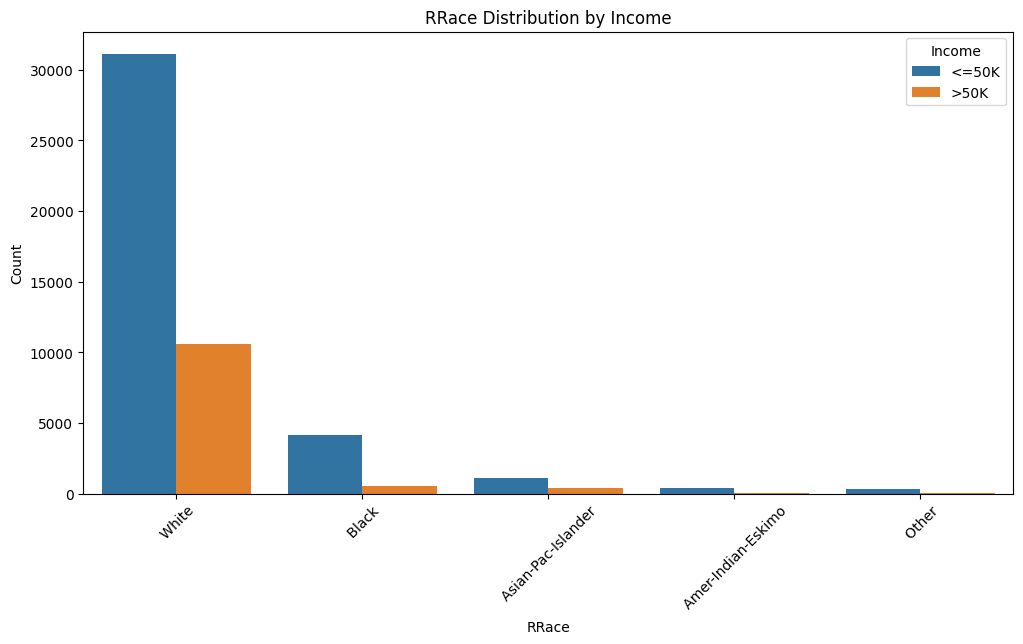


 --Value Counts-- 

 White                 41762
 Black                  4685
 Asian-Pac-Islander     1519
 Amer-Indian-Eskimo      470
 Other                   406
Name:  race, dtype: int64


In [ ]:
plt.figure(figsize=(12, 6))  # Điều chỉnh kích thước biểu đồ
sns.countplot(data=df, x=' race', hue=' income')
# Đặt tiêu đề và nhãn trục
plt.title('RRace Distribution by Income')
plt.xlabel('RRace')
plt.ylabel('Count')
# Điều chỉnh và đặt chú thích
plt.xticks(rotation=45)
plt.legend(title='Income', labels=['<=50K', '>50K'])
# Hiển thị biểu đồ
plt.show()
print('\n --Value Counts-- \n')
print(df[' race'].value_counts())

Ta thấy người white có thu nhập >50K cao nhất

Text(0.5, 1.0, 'Countplot for Gender Per Class')

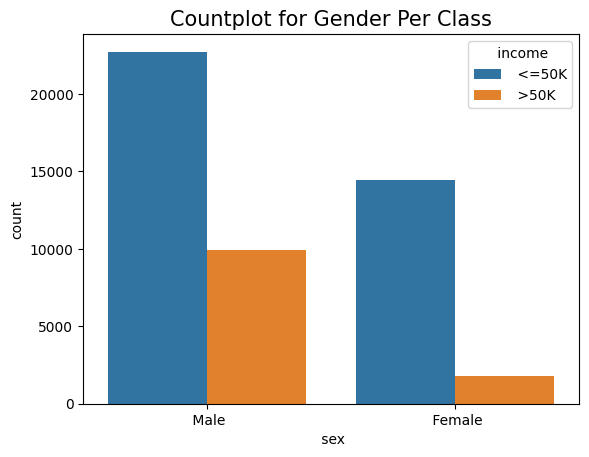

In [ ]:
# Count Plot For Gender Per Class
sns.countplot(x=' sex' ,data=df, hue=' income')
plt.title("Countplot for Gender Per Class", fontsize = 15)

Ta thấy tỷ lệ thu nhập >50K của đàn ông lớn hơn phụ nữ

In [ ]:
# Transforming native country column with value as either United States or Other.
countries = df[' native-country'].unique()[1:]
df[' native-country'] = df[' native-country'].replace(to_replace=countries, value='Other')

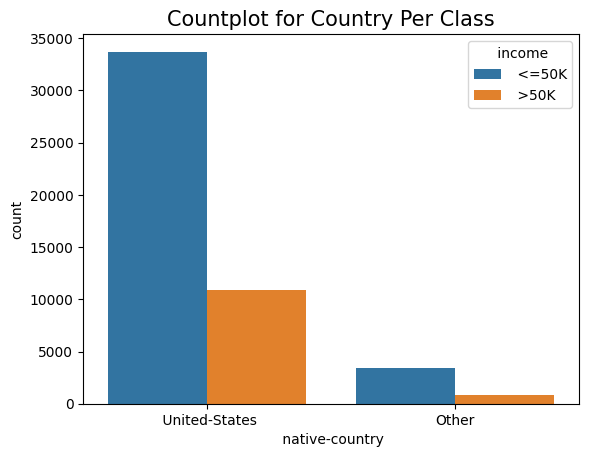


 --Value Counts-- 

 United-States    44612
Other              4230
Name:  native-country, dtype: int64


In [ ]:
# Countplot for Country Per Class
sns.countplot(x=' native-country' ,data=df, hue=' income')
plt.title('Countplot for Country Per Class', fontsize = 15)
plt.show()
print('\n --Value Counts-- \n')
print(df[' native-country'].value_counts())

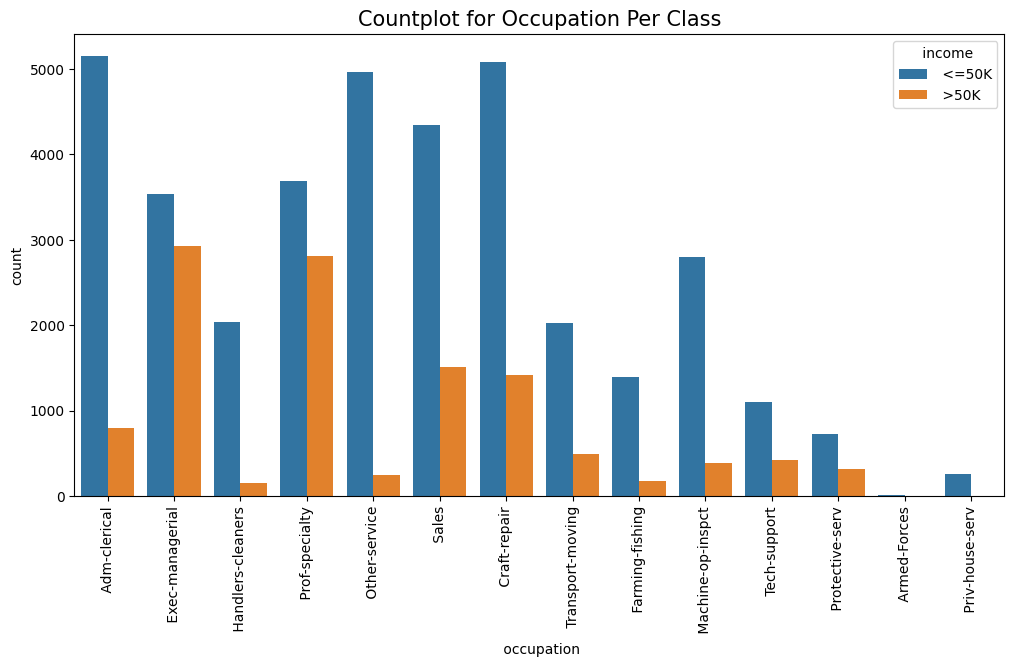

In [ ]:
plt.figure(figsize=[12,6])
sns.countplot(x=' occupation' ,data=df, hue=' income')
plt.title('Countplot for Occupation Per Class', fontsize = 15)
plt.xticks(rotation=90)
plt.show()

Ta thấy trong occupation : Exec-managerialmanagerial(quản lý) Prof-specialty(giáo sư chuyên môn) có mức thu nhập >50k cao nhất

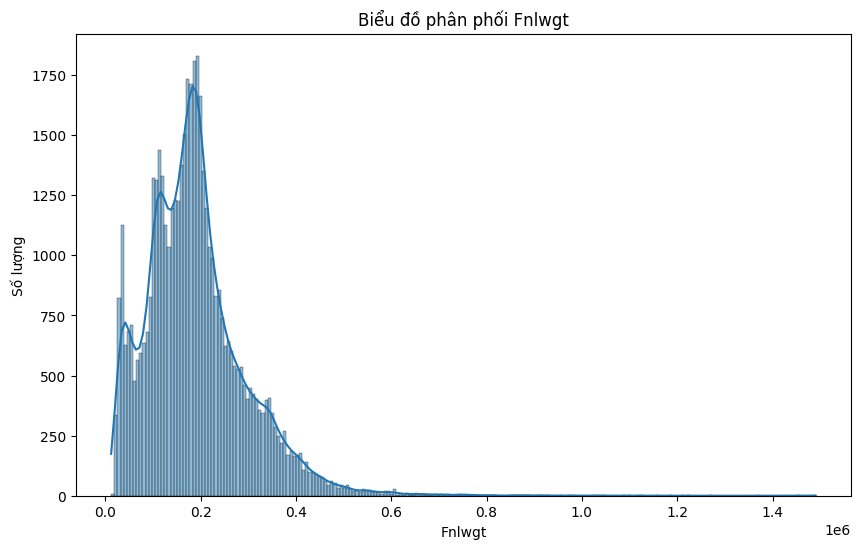

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[' fnlwgt'], kde=True)
plt.title('Biểu đồ phân phối Fnlwgt')
plt.xlabel('Fnlwgt')
plt.ylabel('Số lượng')
plt.show()

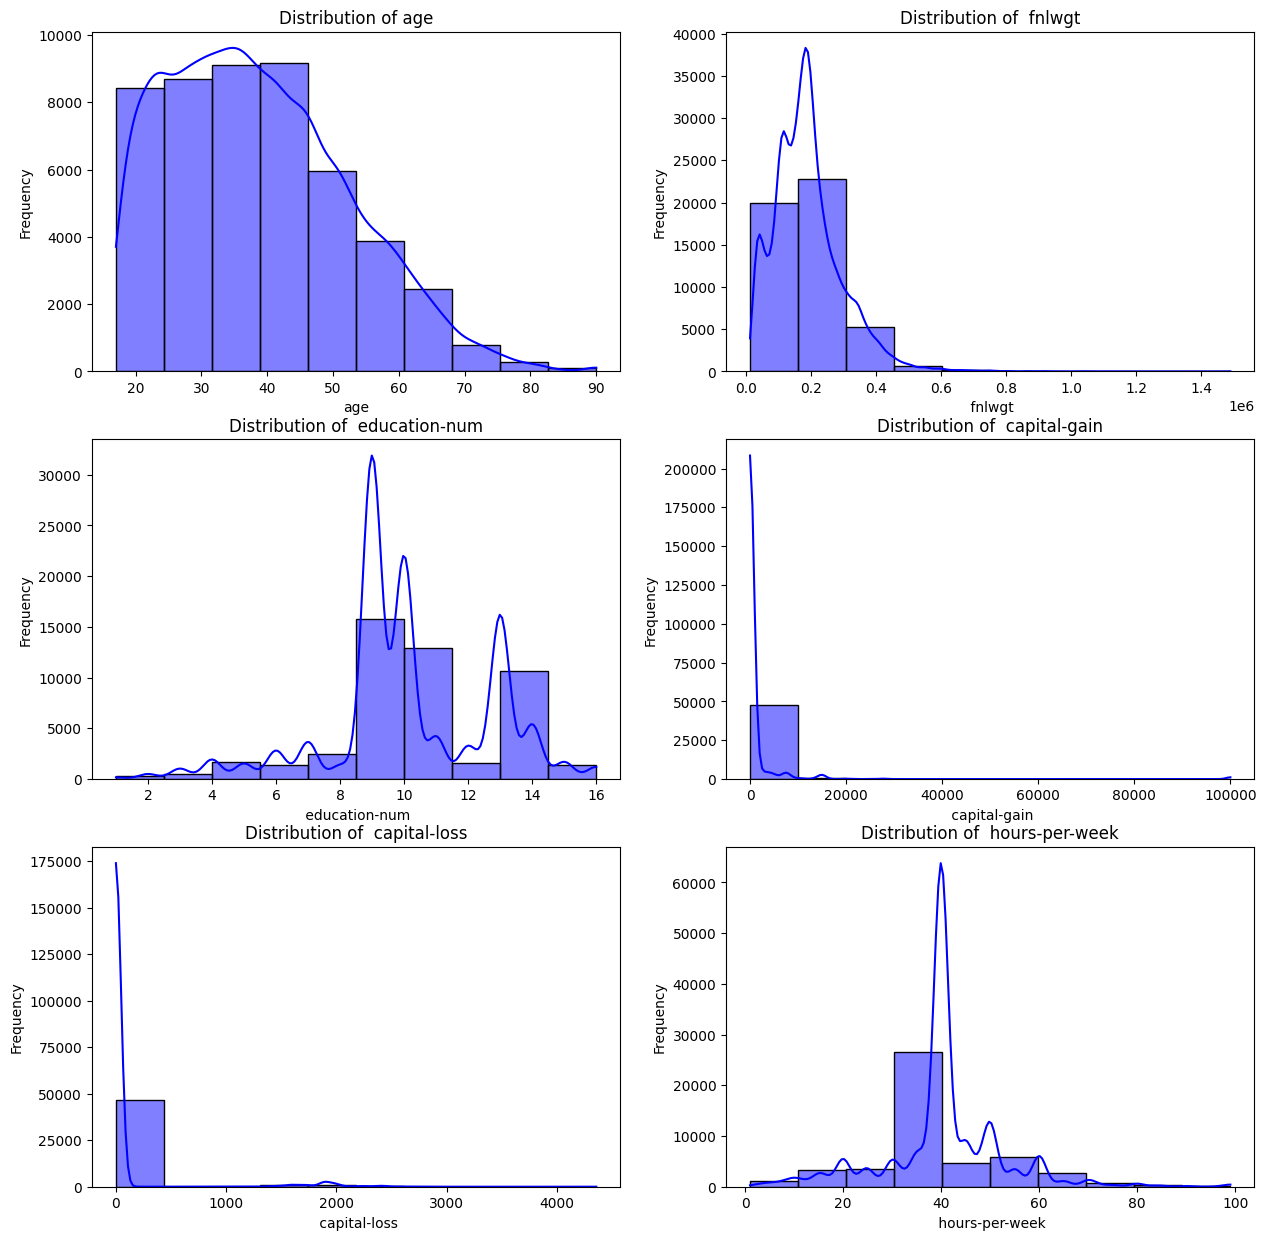

In [ ]:
numerical_attributes = df.select_dtypes(include=['number']).columns
num_rows_num = (len(numerical_attributes) - 1) // 2 + 1

# Create subplots for numerical attributes
plt.figure(figsize=(15, 5 * num_rows_num))
for i, attr in enumerate(numerical_attributes):
    plt.subplot(num_rows_num, 2, i + 1)
    sns.histplot(df[attr], bins=10, kde=True, color='blue')
    plt.xlabel(attr)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {attr}')

Text(0, 0.5, 'Age')

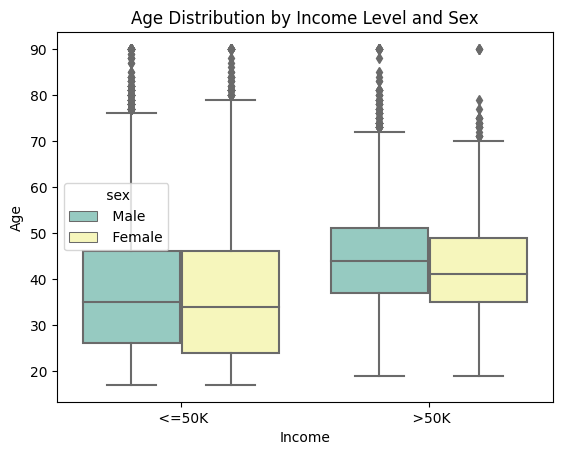

In [ ]:
sns.boxplot(x=" income", y="age", hue=" sex", data=df, palette="Set3")
plt.title("Age Distribution by Income Level and Sex")
plt.xlabel("Income")
plt.ylabel("Age")

In [ ]:
# Lọc dữ liệu chỉ cho người đàn ông có thu nhập trên 50K
high_income_male = df[(df[' sex'] == ' Male') & (df[' income'] == ' >50K')]

# In thông tin chi tiết về người đàn ông có thu nhập trên 50K
print("Thông tin chi tiết về người đàn ông có thu nhập trên 50K:")
print(high_income_male.describe())

Thông tin chi tiết về người đàn ông có thu nhập trên 50K:
               age        fnlwgt   education-num   capital-gain  \
count  9918.000000  9.918000e+03     9918.000000    9918.000000   
mean     44.641863  1.892698e+05       11.561908    3993.827586   
std      10.527021  1.031187e+05        2.411225   14767.317445   
min      19.000000  1.376900e+04        1.000000       0.000000   
25%      37.000000  1.194162e+05        9.000000       0.000000   
50%      44.000000  1.774105e+05       12.000000       0.000000   
75%      51.000000  2.356460e+05       13.000000       0.000000   
max      90.000000  1.226583e+06       16.000000   99999.000000   

        capital-loss   hours-per-week  
count    9918.000000      9918.000000  
mean      195.902299        46.304396  
std       595.035134        10.729244  
min         0.000000         1.000000  
25%         0.000000        40.000000  
50%         0.000000        44.000000  
75%         0.000000        50.000000  
max      3004.0000

Male:
1. age : 44 | capital-gain : 3981 | capital-loss : 196 | hours-per-week : 46

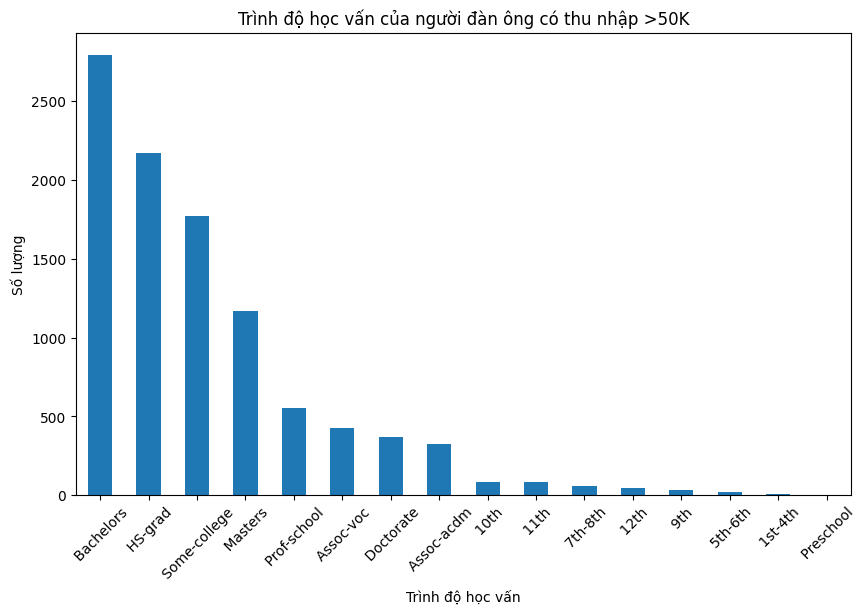

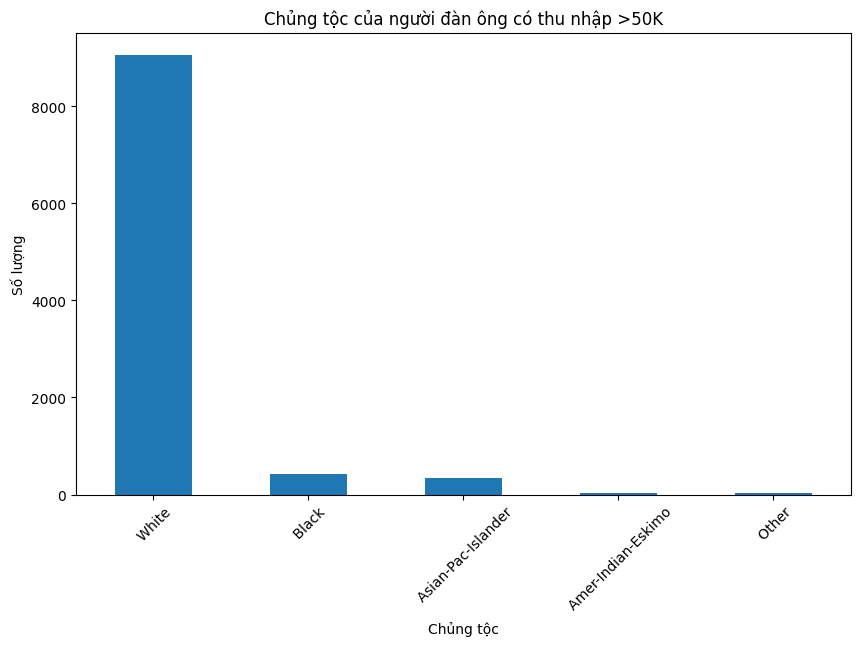

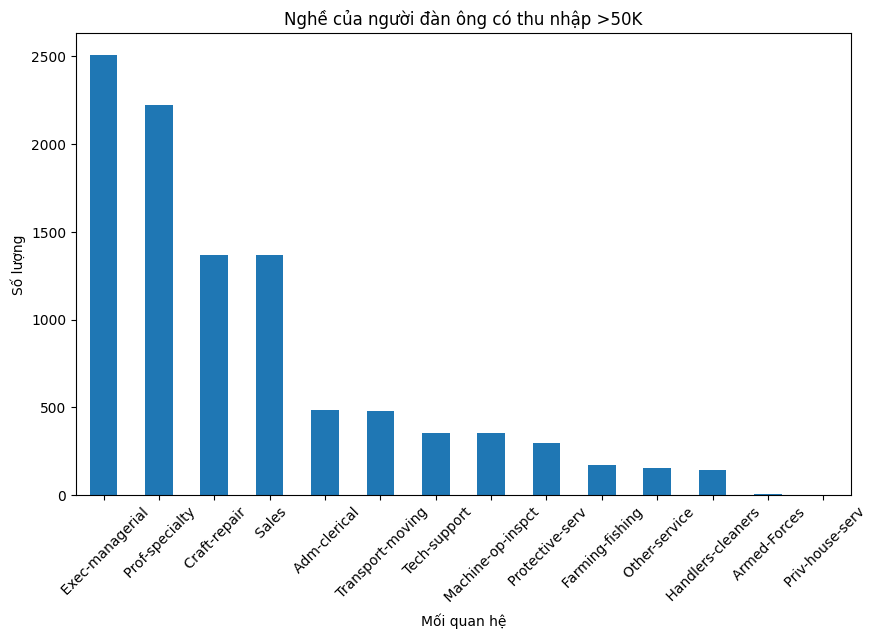

In [ ]:
# Lọc ra chỉ các hàng có giới tính là "Nam" và thu nhập trên 50K
men_with_high_income = df[(df[' sex'] == ' Male') & (df[' income'] == ' >50K')]

# Đếm số lượng theo trình độ học vấn
education_counts = men_with_high_income[' education'].value_counts()

# Vẽ biểu đồ cột cho trình độ học vấn
plt.figure(figsize=(10, 6))
education_counts.plot(kind='bar')
plt.xlabel('Trình độ học vấn')
plt.ylabel('Số lượng')
plt.title('Trình độ học vấn của người đàn ông có thu nhập >50K')
plt.xticks(rotation=45)
plt.show()

# Đếm số lượng theo chủng tộc
race_counts = men_with_high_income[' race'].value_counts()

# Vẽ biểu đồ cột cho chủng tộc
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar')
plt.xlabel('Chủng tộc')
plt.ylabel('Số lượng')
plt.title('Chủng tộc của người đàn ông có thu nhập >50K')
plt.xticks(rotation=45)
plt.show()

# Đếm số lượng theo mối quan hệ
relationship_counts = men_with_high_income[' occupation'].value_counts()

# Vẽ biểu đồ cột cho mối quan hệ
plt.figure(figsize=(10, 6))
relationship_counts.plot(kind='bar')
plt.xlabel('Mối quan hệ')
plt.ylabel('Số lượng')
plt.title('Nghề của người đàn ông có thu nhập >50K')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = df.drop(' education', axis=1)

In [ ]:
# Khởi tạo LabelEncoder
lab = LabelEncoder()
obj_cols = df.select_dtypes(include=['object']).columns
# Tạo một bản sao của DataFrame để tránh thay đổi dữ liệu gốc
df_encoded = df.copy()

# Lặp qua các cột đối tượng và biến đổi dữ liệu
for col in obj_cols:
    encoded_data = lab.fit_transform(df[col])
    df_encoded[col] = encoded_data

    # Tạo ánh xạ giữa giá trị gốc và giá trị đã biến đổi
    label_mapping = dict(zip(lab.classes_, lab.transform(lab.classes_)))
    print(f'Ánh xạ cho cột {col}:')
    print(label_mapping)


Ánh xạ cho cột  workclass:
{' Federal-gov': 0, ' Local-gov': 1, ' Never-worked': 2, ' Private': 3, ' Self-emp-inc': 4, ' Self-emp-not-inc': 5, ' State-gov': 6, ' Without-pay': 7}
Ánh xạ cho cột  marital-status:
{' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
Ánh xạ cho cột  occupation:
{' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-support': 12, ' Transport-moving': 13}
Ánh xạ cho cột  relationship:
{' Husband': 0, ' Not-in-family': 1, ' Other-relative': 2, ' Own-child': 3, ' Unmarried': 4, ' Wife': 5}
Ánh xạ cho cột  race:
{' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}
Ánh xạ cho cột  sex:
{' Female': 0, ' Male': 1}
Ánh xạ 

In [ ]:
lab = LabelEncoder()
obj_cols = df.select_dtypes(include=['object']).columns

for col in obj_cols:
  df[col] = lab.fit_transform(df[col])

In [ ]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,13,4,0,1,4,1,2174,0,40,0,0
1,50,5,83311,13,2,3,0,4,1,0,0,13,0,0
2,38,3,215646,9,0,5,1,4,1,0,0,40,0,0
3,53,3,234721,7,2,5,0,2,1,0,0,40,0,0
4,28,3,338409,13,2,9,5,2,0,0,0,40,1,0


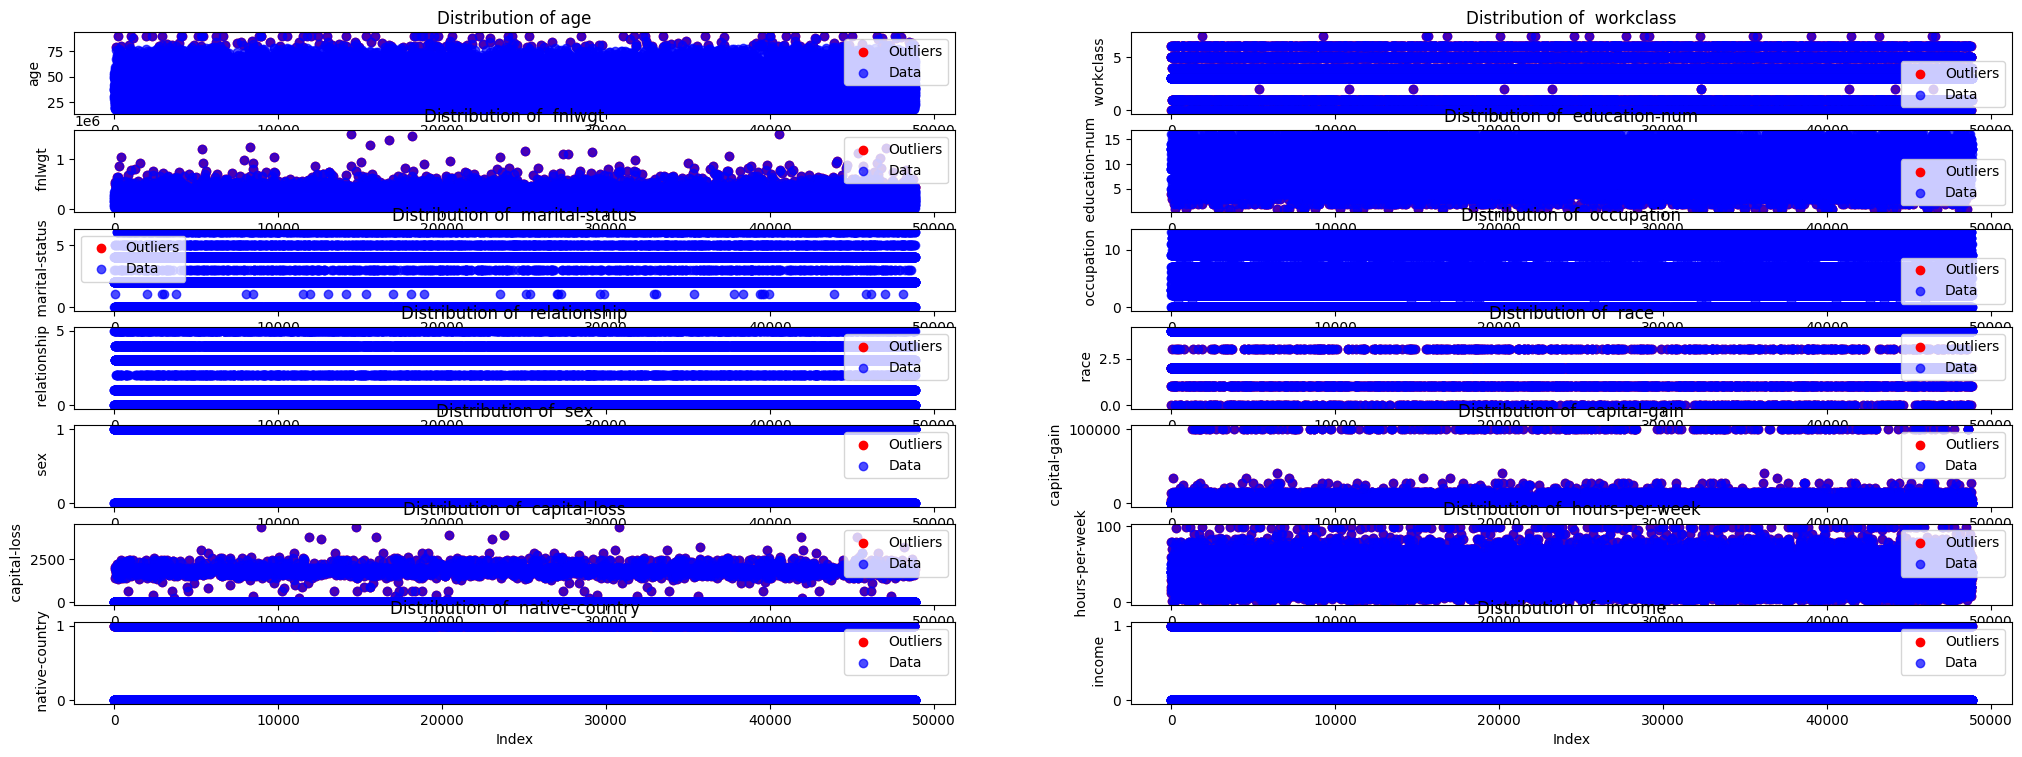

In [ ]:
# Set the threshold for detecting outliers (adjust as needed)
threshold = 1.5
plt.figure(figsize=(25, 10))
num_rows_num = len(df.select_dtypes(include='number').columns)//2+1

for i, col in enumerate(df.select_dtypes(include='number').columns):
    plt.subplot(num_rows_num,2, i + 1)

    # Calculate the IQR for the attribute
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Detect and plot outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
    # Plot the attribute
    plt.scatter(df.index, df[col], color='blue', alpha=0.7, label='Data')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.title(f'Distribution of {col}')
    plt.legend()

# **KNN**

In [ ]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
# Encode categorical attributes
categorical_cols = [' income']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# Split the dataset into features (X) and target variable (y)
X = df.drop(' income', axis=1)
y = df[' income']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
k_values = list(range(1, 15))  # Testing k from 1 to 4
# Initialize variables to store results
best_k = None
best_accuracy = 0

# Iterate through different k values and perform cross-validation
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_classifier, X_train_scaled, y_train, cv=5)
    mean_accuracy = np.mean(scores)

    # Check if this k value gives a higher accuracy
    if mean_accuracy > best_accuracy:
        best_accuracy = mean_accuracy
        best_k = k

# Train the KNN classifier with the best k value on the full training set
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data using the best k
y_pred = best_knn_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier with the best k
accuracy = accuracy_score(y_test, y_pred)
print(f"Best k: {best_k}")
print(f"Accuracy with best k: {accuracy * 100:.2f}%")

Best k: 14
Accuracy with best k: 83.57%


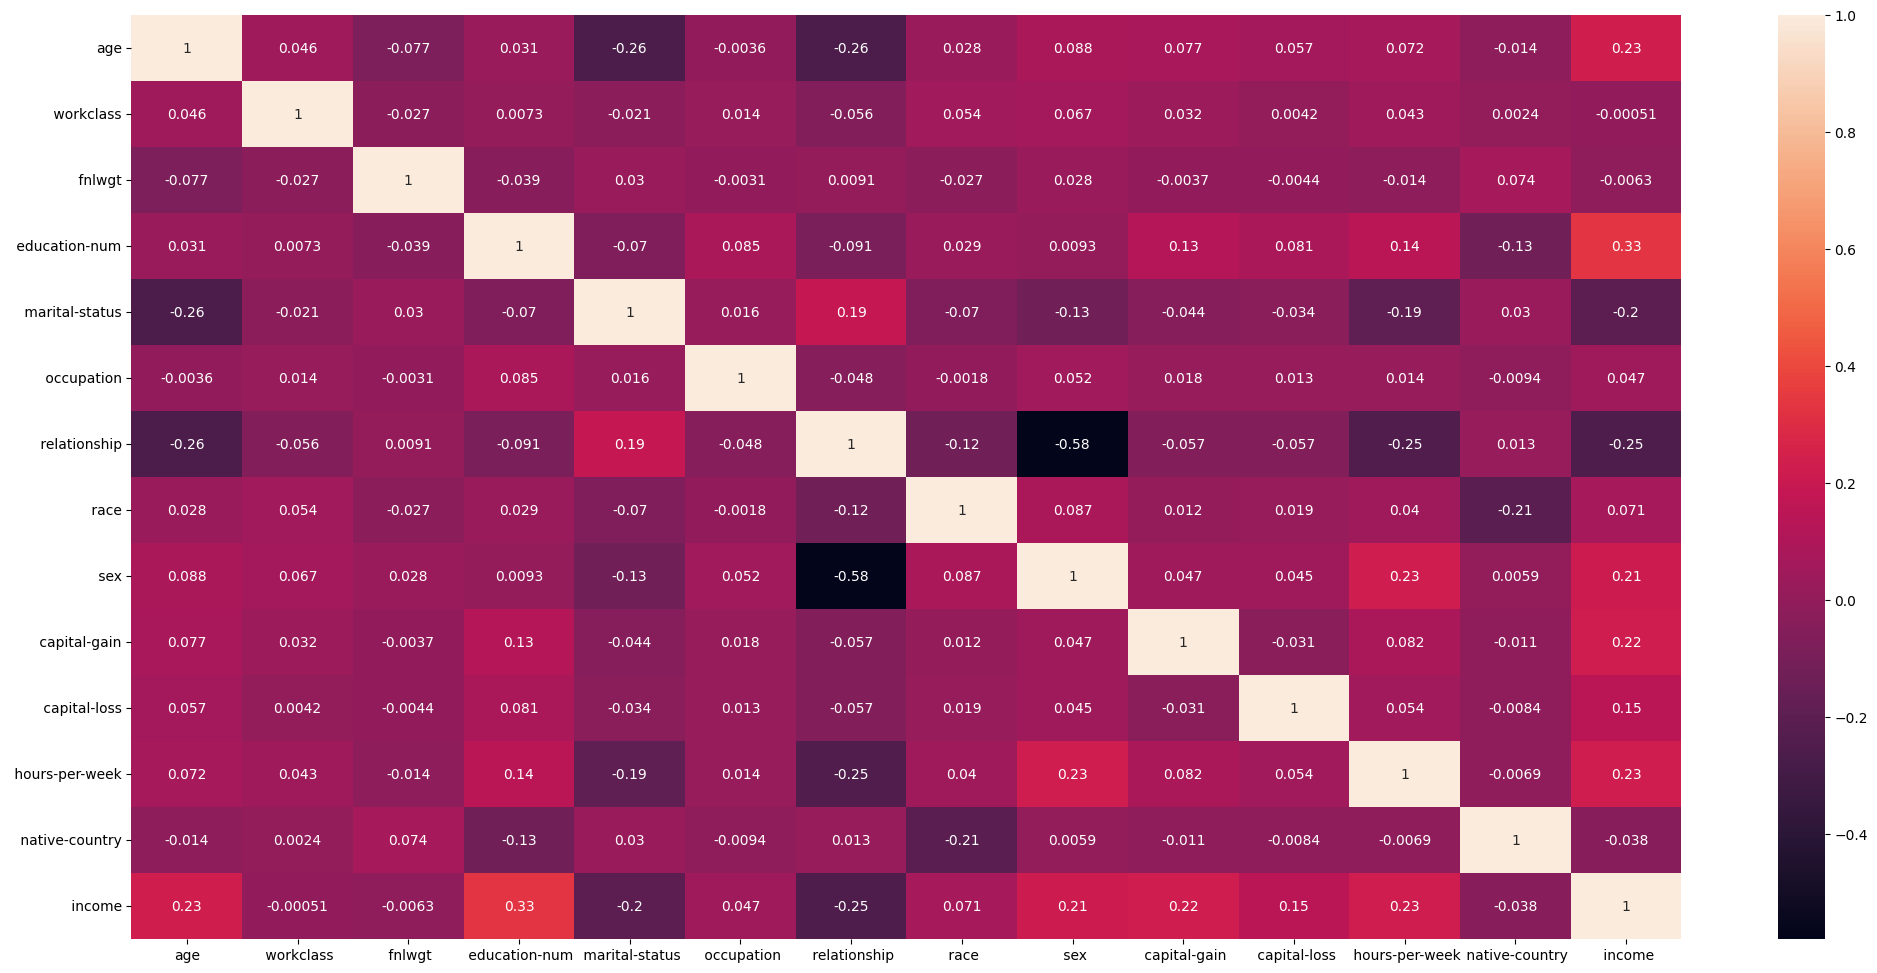

In [ ]:
corr = df.corr()
plt.subplots(figsize=(25,12))
sns.heatmap(corr, vmax = 1,square = False,annot=True)
plt.show()

# **DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
md_values = range(1, 10)

best_max_depth = None
best_accuracy = 0

for max_depth in md_values:  # Thử các giá trị max_depth từ 1 đến 20
    # Tạo mô hình cây quyết định với max_depth cụ thể
    clf = DecisionTreeClassifier(max_depth=max_depth)

    # Thực hiện cross-validation với 5 folds và tính độ chính xác trung bình
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

    accuracy = np.mean(scores)
    print(f"Max Depth = {max_depth}: Accuracy = {accuracy}")
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_max_depth = max_depth

print("max_depth tốt nhất là:", best_max_depth)
print("Độ chính xác tốt nhất trên tập huấn luyện:", best_accuracy)

# Huấn luyện mô hình với max_depth tốt nhất trên toàn bộ tập huấn luyện
best_model = DecisionTreeClassifier(max_depth=best_max_depth)
best_model.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
test_accuracy = best_model.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

Max Depth = 1: Accuracy = 0.7618239802242525
Max Depth = 2: Accuracy = 0.8273420953371969
Max Depth = 3: Accuracy = 0.8405919770626792
Max Depth = 4: Accuracy = 0.8481674283763786
Max Depth = 5: Accuracy = 0.854192864274499
Max Depth = 6: Accuracy = 0.8550704079359667
Max Depth = 7: Accuracy = 0.8562111222922365
Max Depth = 8: Accuracy = 0.8569130776516112
Max Depth = 9: Accuracy = 0.8573518195367216
max_depth tốt nhất là: 9
Độ chính xác tốt nhất trên tập huấn luyện: 0.8573518195367216
Độ chính xác trên tập kiểm tra: 0.853681839896267


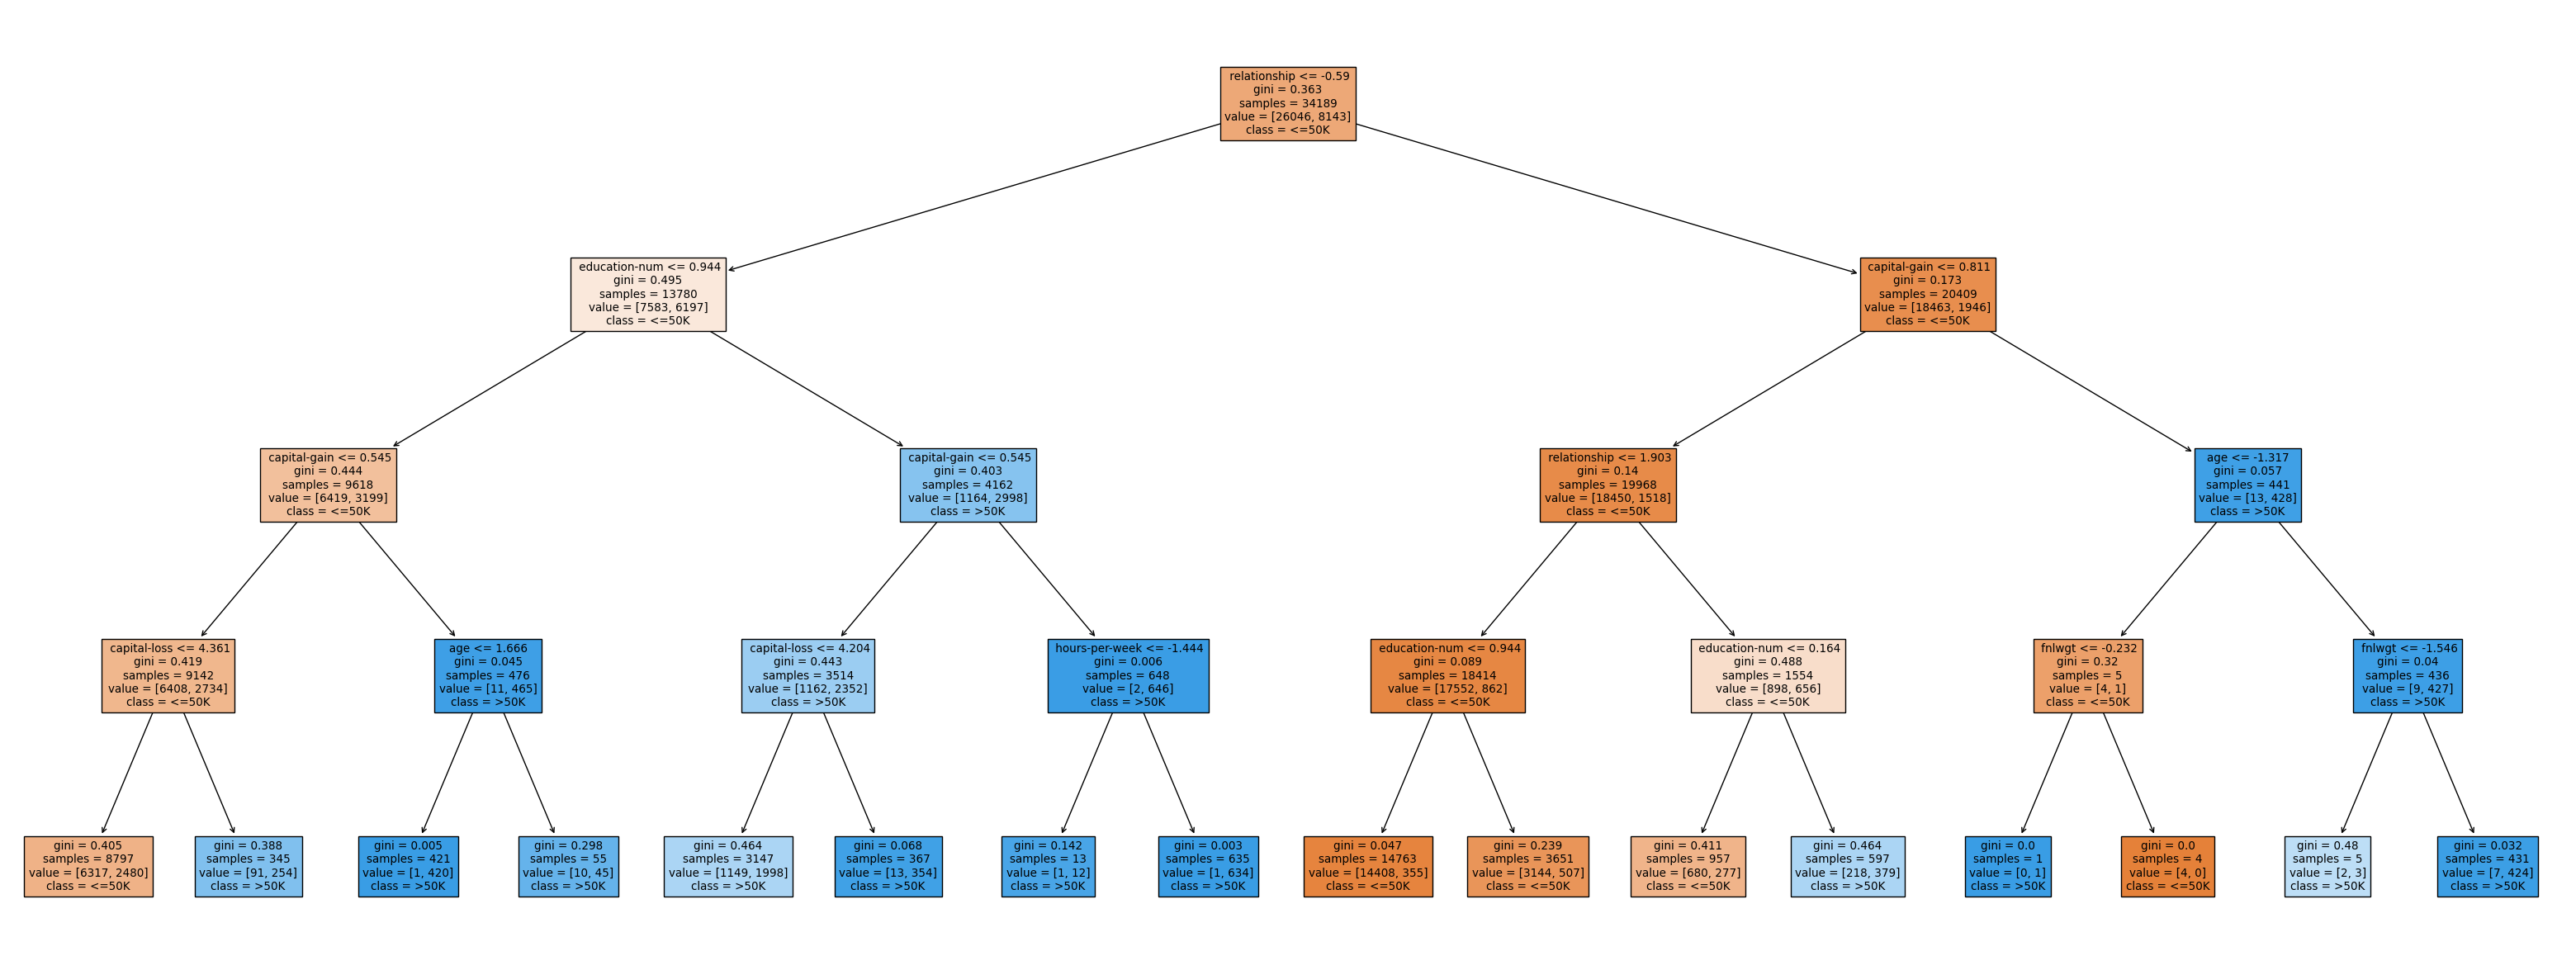

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Tạo mô hình cây quyết định
decision_tree = DecisionTreeClassifier(max_depth=4)

# Huấn luyện mô hình trên toàn bộ tập dữ liệu
decision_tree.fit(X_train_scaled, y_train)

# Vẽ cây quyết định
fig, axis = plt.subplots(figsize=(40, 15))
plot_tree(decision_tree, feature_names=X.columns, filled=True, class_names=['<=50K', '>50K'])
plt.show()

# **RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_values = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
best_n_estimators = None
best_accuracy = 0

for n_estimators in n_estimators_values:  # Thử các giá trị n_estimators từ 1 đến 100
    # Tạo mô hình Random Forest với n_estimators cụ thể
    clf_rd = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Thực hiện cross-validation với 5 folds và tính độ chính xác trung bình
    scores_rd = cross_val_score(clf_rd, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_rd = np.mean(scores_rd)
    print(f"n_estimators = {n_estimators}: Accuracy = {accuracy_rd}")
    if accuracy_rd > best_accuracy:
        best_accuracy = accuracy_rd
        best_n_estimators = n_estimators

print("n_estimators tốt nhất là:", best_n_estimators)
print("Độ chính xác tốt nhất trên tập huấn luyện:", best_accuracy)

# Huấn luyện mô hình với n_estimators tốt nhất trên toàn bộ tập huấn luyện
best_model_rd = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
best_model_rd.fit(X_train, y_train)

# Đánh giá mô hình trên tập kiểm tra
test_accuracy_rd = best_model_rd.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", test_accuracy)

n_estimators = 10: Accuracy = 0.8520870281419984
n_estimators = 20: Accuracy = 0.854251536306737
n_estimators = 30: Accuracy = 0.8564744298813174
n_estimators = 40: Accuracy = 0.857264147307142
n_estimators = 50: Accuracy = 0.8575566219334666
n_estimators = 60: Accuracy = 0.8580538775668052
n_estimators = 70: Accuracy = 0.8583171338205317
n_estimators = 80: Accuracy = 0.8585218506583525
n_estimators = 90: Accuracy = 0.8585511289221976
n_estimators = 100: Accuracy = 0.8591946175907523
n_estimators tốt nhất là: 100
Độ chính xác tốt nhất trên tập huấn luyện: 0.8591946175907523
Độ chính xác trên tập kiểm tra: 0.853681839896267


In [ ]:
RF_classifier = RandomForestClassifier(n_estimators=best_n_estimators, random_state=42)
RF_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data using the best k
y_pred_test = RF_classifier.predict(X_test_scaled)

# Evaluate the accuracy of the classifier with the best k
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Best n_estimators: {best_n_estimators}")
print(f"Accuracy with best k: {accuracy_test * 100:.2f}%")

Best n_estimators: 100
Accuracy with best k: 85.72%


# **Naive Bayes + SVM**

In [ ]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.svm import SVC

# Create a Categorical Naive Bayes classifier
naive_bayes_classifier = CategoricalNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb * 100:.2f}%')

# Generate a classification report (includes precision, recall, F1-score, and support)
classification_rep = classification_report(y_test, y_pred_nb)
print('\nClassification Report:\n', classification_rep)

Accuracy: 85.15%

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90     11109
           1       0.72      0.63      0.67      3544

    accuracy                           0.85     14653
   macro avg       0.80      0.78      0.79     14653
weighted avg       0.85      0.85      0.85     14653



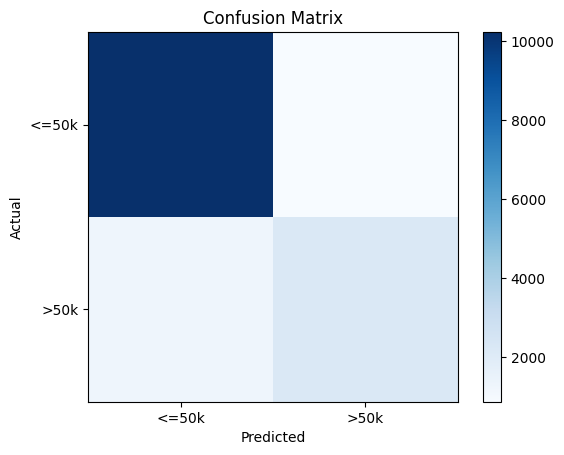

In [ ]:
from sklearn.metrics import confusion_matrix

# Tính ma trận confusion
cm = confusion_matrix(y_test, y_pred_nb)

# Vẽ biểu đồ confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['<=50k', '>50k'])
plt.yticks([0, 1], ['<=50k', '>50k'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_nb = naive_bayes_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Accuracy: {accuracy_nb * 100:.2f}%')

# Generate a classification report (includes precision, recall, F1-score, and support)
classification_rep = classification_report(y_test, y_pred_nb)
print('\nClassification Report:\n', classification_rep)

Accuracy: 79.55%

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.88     11109
           1       0.67      0.31      0.42      3544

    accuracy                           0.80     14653
   macro avg       0.74      0.63      0.65     14653
weighted avg       0.78      0.80      0.77     14653



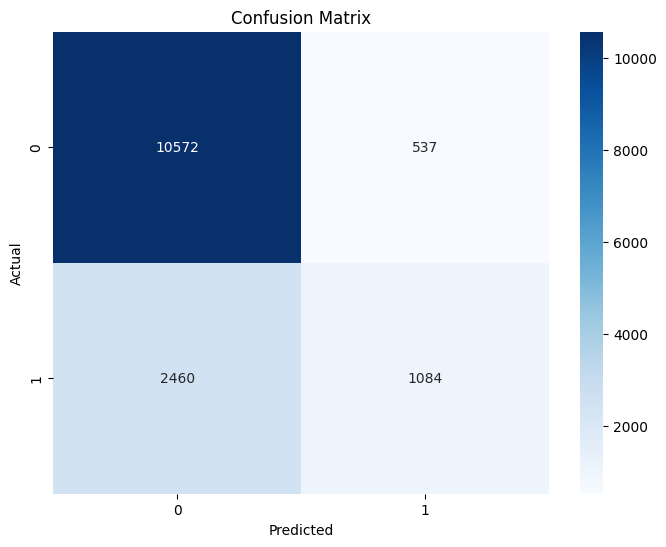

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Tính ma trận confusion
cm = confusion_matrix(y_test, y_pred_nb)

# Vẽ biểu đồ confusion matrix bằng seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Create a linear SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_svm = svm_classifier.predict(X_test)

# Calculate the accuracy of the classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'Accuracy: {accuracy_svm * 100:.2f}%')

# Generate a classification report (includes precision, recall, F1-score, and support)
classification_rep_svm = classification_report(y_test, y_pred_svm)
print('\nClassification Report:\n', classification_rep_svm)

Accuracy: 79.56%

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88     11109
           1       0.98      0.16      0.27      3544

    accuracy                           0.80     14653
   macro avg       0.88      0.58      0.58     14653
weighted avg       0.83      0.80      0.73     14653



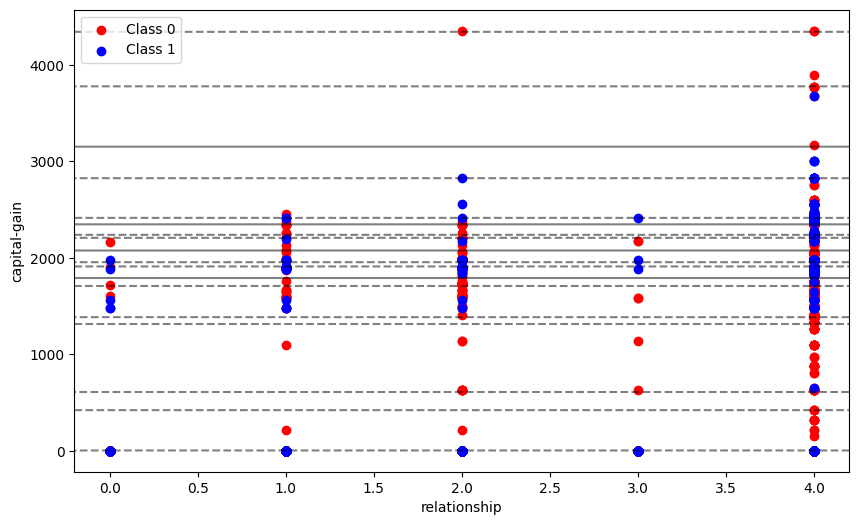

In [ ]:
selected_features = df.iloc[:, [7, 10]]
X1 = selected_features.values
y1 = df[' income']  # Giả sử cột kết quả nằm ở cột thứ 14, điều này có thể khác trong tập dữ liệu của bạn

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Xây dựng mô hình SVM
model = SVC()
model.fit(X_train1, y_train1)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.scatter(X_train1[y_train1 == 0][:, 0], X_train1[y_train1 == 0][:, 1], color='r', label='Class 0')
plt.scatter(X_train1[y_train1 == 1][:, 0], X_train1[y_train1 == 1][:, 1], color='b', label='Class 1')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Tạo lưới để vẽ biên quyết định
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vẽ biên quyết định
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
            linestyles=['--', '-', '--'])
plt.xlabel('relationship')
plt.ylabel('capital-gain')
plt.legend()
plt.show()

# ANN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Tạo dữ liệu giả định
np.random.seed(42)
x_data = np.random.rand(100, 1)
y_data = 3 * x_data + 2 + 0.1 * np.random.randn(100, 1)

# Chuyển đổi dữ liệu Numpy thành tensors PyTorch
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

# Xây dựng mạng nơ-ron
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1, 1)  # Một lớp đầy đủ (fully connected layer)

    def forward(self, x):
        x = self.fc1(x)
        return x

# Khởi tạo mô hình
model = NeuralNet()

# Chọn hàm loss và bộ tối ưu hóa
criterion = nn.MSELoss()  # Hàm mất mát Mean Squared Error (MSE)
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent (SGD)

# Huấn luyện mô hình
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass và cập nhật trọng số
    optimizer.zero_grad()  # Đặt gradient về 0
    loss.backward()  # Tính gradient
    optimizer.step()  # Cập nhật trọng số

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Kiểm tra kết quả
with torch.no_grad():
    x_test = torch.FloatTensor([[1.0]])
    predicted = model(x_test)
    print(f'Predicted value: {predicted.item()}')


Epoch [100/1000], Loss: 0.2956
Epoch [200/1000], Loss: 0.1910
Epoch [300/1000], Loss: 0.1456
Epoch [400/1000], Loss: 0.1117
Epoch [500/1000], Loss: 0.0861
Epoch [600/1000], Loss: 0.0669
Epoch [700/1000], Loss: 0.0524
Epoch [800/1000], Loss: 0.0414
Epoch [900/1000], Loss: 0.0332
Epoch [1000/1000], Loss: 0.0270
Predicted value: 4.747883319854736


In [ ]:
df = pd.DataFrame({'age': [10, 20, 30, 40, 50]})
try:
    # Calculate the value counts
    value_counts = df['income'].value_counts()

    # Calculate the percentage distribution
    percentage_distribution = (value_counts / len(df)) * 100

    # Display the result
    print(percentage_distribution)
except KeyError as e:
    print(e)


'income'


In [ ]:
# X = df.iloc[:, 3:-1].values
# y = df.iloc[:, -1].values


In [ ]:
# X

In [ ]:
#Initializing the ANN
#Creating the Sequential model, you can add layers to it one by one, defining the architecture of your neural network.
import tensorflow as tf
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
y_pred = ann.predict(X_test_scaled)
y_pred = (y_pred > 0.5)

458/458 [==============================] - 1s 1ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4869 6240]
 [ 970 2574]]


0.5079505903228008

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.2920353982300885
Recall: 0.7262979683972912
F1-Score: 0.41657226088363813


# Clustering

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('adult.data')
df.head()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
relationship_values = df[' relationship'].unique()
print(relationship_values)


[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']


In [ ]:
# Tạo một ánh xạ từ dict để ánh xạ giữa các đối tượng và các giá trị int64 tương ứng
relationship_mapping = {
    ' Not-in-family': 1,
    ' Husband': 2,
    ' Wife': 3,
    ' Own-child': 4,
    ' Unmarried': 5,
    ' Other-relative': 6
}

# Sử dụng phương thức .replace() để thay thế giá trị trong cột "relationship" bằng giá trị tương ứng từ ánh xạ
df[' relationship'] = df[' relationship'].replace(relationship_mapping)

# In ra vài hàng đầu của DataFrame để kiểm tra kết quả
print(df.head())

   age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation   relationship    race      sex  \
0        Never-married        Adm-clerical              1   White     Male   
1   Married-civ-spouse     Exec-managerial              2   White     Male   
2             Divorced   Handlers-cleaners              1   White     Male   
3   Married-civ-spouse   Handlers-cleaners              2   Black     Male   
4   Married-civ-spouse      Prof-specialty              3   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country  income  
0           2174              0               40   United-S

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1    workclass       48842 non-null  object
 2    fnlwgt          48842 non-null  int64 
 3    education       48842 non-null  object
 4    education-num   48842 non-null  int64 
 5    marital-status  48842 non-null  object
 6    occupation      48842 non-null  object
 7    relationship    48842 non-null  int64 
 8    race            48842 non-null  object
 9    sex             48842 non-null  object
 10   capital-gain    48842 non-null  int64 
 11   capital-loss    48842 non-null  int64 
 12   hours-per-week  48842 non-null  int64 
 13   native-country  48842 non-null  object
 14   income          48842 non-null  object
dtypes: int64(7), object(8)
memory usage: 5.6+ MB


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Generate a sample dataset with multiple types of attributes
np.random.seed(0)

# Define features and preprocessing for numerical attributes
numeric_features = [' education-num', ' relationship']
numeric_transformer = StandardScaler()

# Define preprocessing for categorical attributes
categorical_features = [' capital-gain', ' capital-loss']
categorical_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

# Combine preprocessing for both numerical and categorical attributes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the dataset
X = preprocessor.fit_transform(df)

# Now, X contains the preprocessed data


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


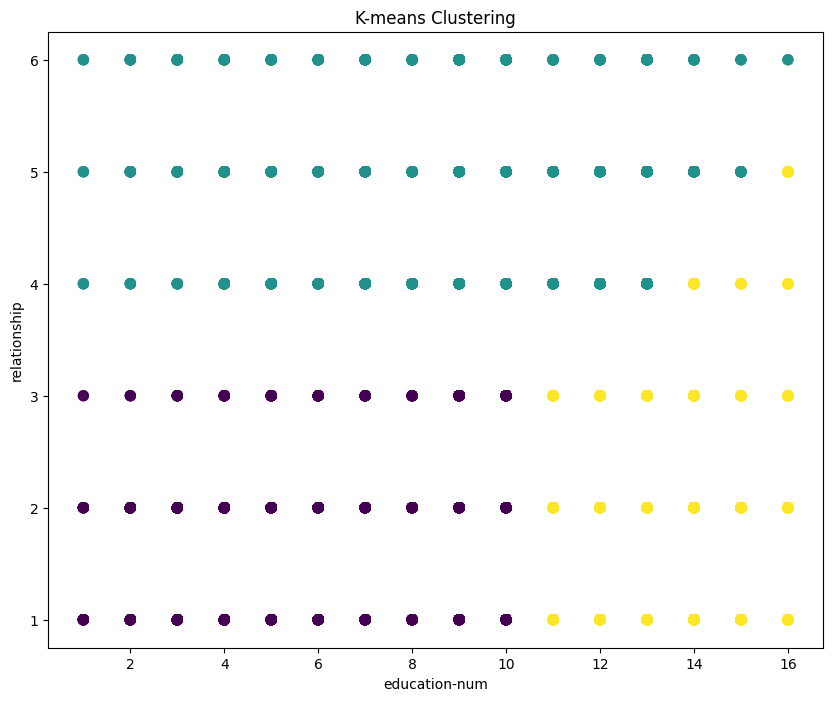

In [ ]:
from sklearn.cluster import KMeans
# Apply K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clustering results
plt.figure(figsize=(10, 8))
plt.scatter(df[' education-num'], df[' relationship'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('education-num')
plt.ylabel('relationship')
plt.title('K-means Clustering')
plt.show()

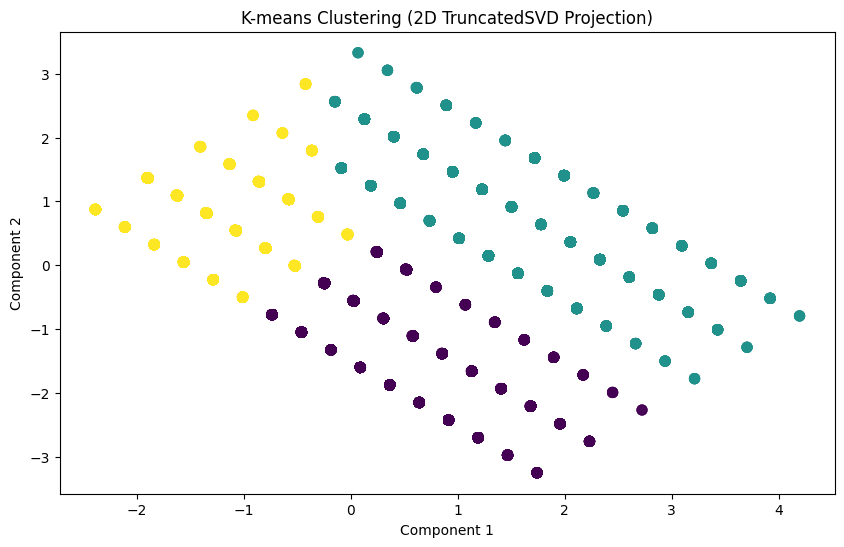

In [ ]:
from sklearn.decomposition import TruncatedSVD

# Create and fit a TruncatedSVD model with the desired number of components
n_components = 2
svd = TruncatedSVD(n_components=n_components)
svd_result = svd.fit_transform(X)

# Create a scatter plot of the clustered data in the reduced 2D space
plt.figure(figsize=(10, 6))
plt.scatter(svd_result[:, 0], svd_result[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.7)
plt.title('K-means Clustering (2D TruncatedSVD Projection)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Cluster 0 Statistics:
        education-num   relationship  Cluster
count    21650.000000   21650.000000  21650.0
mean         8.662171       1.699122      0.0
std          1.775094       0.582597      0.0
min          1.000000       1.000000      0.0
25%          9.000000       1.000000      0.0
50%          9.000000       2.000000      0.0
75%         10.000000       2.000000      0.0
max         10.000000       3.000000      0.0


Cluster 1 Statistics:
        education-num   relationship  Cluster
count    14069.000000   14069.000000  14069.0
mean         9.422063       4.576018      1.0
std          2.164112       0.677009      0.0
min          1.000000       4.000000      1.0
25%          9.000000       4.000000      1.0
50%          9.000000       4.000000      1.0
75%         10.000000       5.000000      1.0
max         16.000000       6.000000      1.0


Cluster 2 Statistics:
        education-num   relationship  Cluster
count    13123.000000   13123.000000  13123.0
mean      

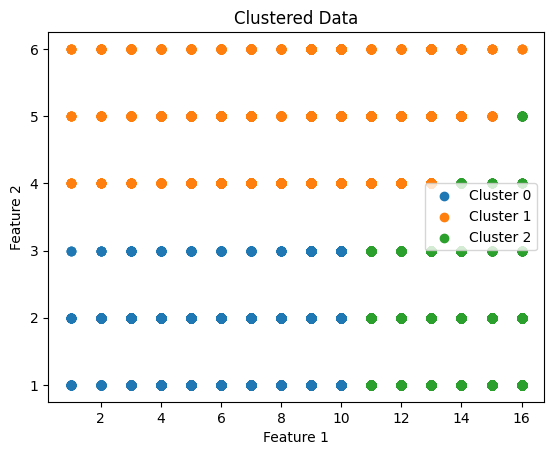

In [ ]:
import pandas as pd
import numpy as np
# Create a DataFrame
# Add cluster labels to the original dataset
data_with_clusters = pd.DataFrame(df, columns=[' education-num', ' relationship'])
data_with_clusters['Cluster'] = pd.Series(cluster_labels)

# Explore data within each cluster
for cluster_id in range(3):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]

    # Basic statistics for each cluster
    cluster_stats = cluster_data.describe()

    # Visualize the cluster
    plt.scatter(cluster_data[' education-num'], cluster_data[' relationship'], label=f'Cluster {cluster_id}')

    # Print cluster statistics
    print(f"Cluster {cluster_id} Statistics:")
    print(cluster_stats)
    print("\n")

# Plot the data points with cluster colors
plt.legend()
plt.title('Clustered Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
# Calculate SSE for the clustering solution
sse = kmeans.inertia_

print(f"SSE: {sse}")

SSE: 38579.00236265366


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


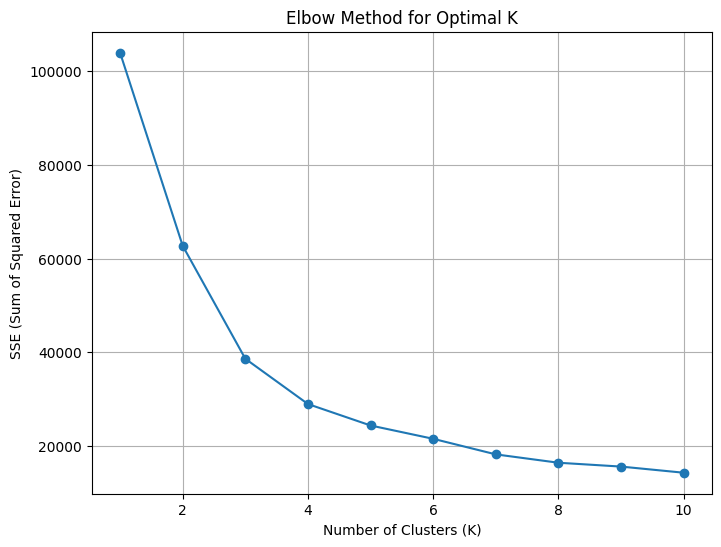

In [ ]:
# Define a range of K values to test
k_values = range(1, 11)  # Try K from 1 to 10 clusters

# Initialize a list to store SSE values for each K
sse = []

# Loop through K values and calculate SSE for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values for different K values
plt.figure(figsize=(8, 6))
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Sum of Squared Error)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()


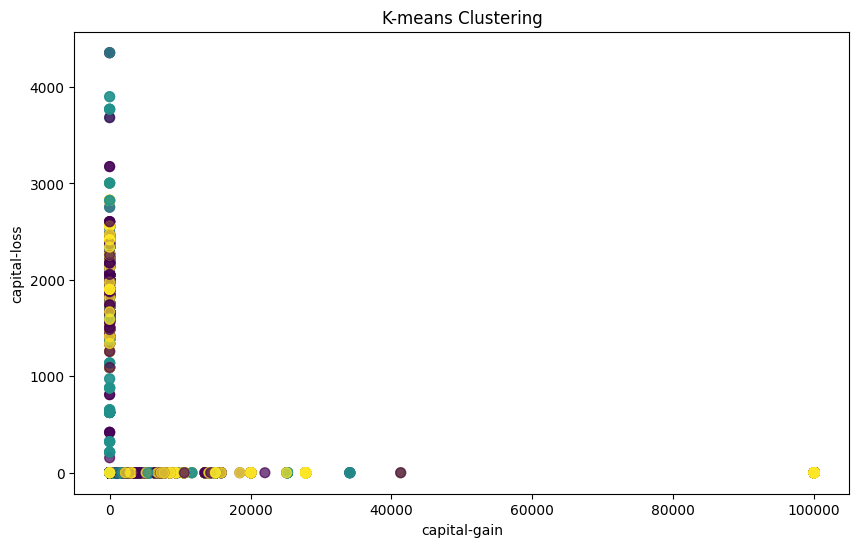

In [ ]:
# Apply K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_labels

# Visualize the clustering results
plt.figure(figsize=(10, 6))
plt.scatter(df[' capital-gain'], df[' capital-loss'], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xlabel('capital-gain')
plt.ylabel('capital-loss')
plt.title('K-means Clustering')
plt.show()

Cluster 0 Statistics:
        capital-gain   capital-loss  Cluster
count   21650.000000   21650.000000  21650.0
mean      677.320970      81.124711      0.0
std      5081.987468     385.732411      0.0
min         0.000000       0.000000      0.0
25%         0.000000       0.000000      0.0
50%         0.000000       0.000000      0.0
75%         0.000000       0.000000      0.0
max     99999.000000    4356.000000      0.0


Cluster 1 Statistics:
        capital-gain   capital-loss  Cluster
count   14069.000000   14069.000000  14069.0
mean      269.950672      43.739143      1.0
std      3191.178332     287.326692      0.0
min         0.000000       0.000000      1.0
25%         0.000000       0.000000      1.0
50%         0.000000       0.000000      1.0
75%         0.000000       0.000000      1.0
max     99999.000000    4356.000000      1.0


Cluster 2 Statistics:
        capital-gain   capital-loss  Cluster
count   13123.000000   13123.000000  13123.0
mean     2609.303208     144.9

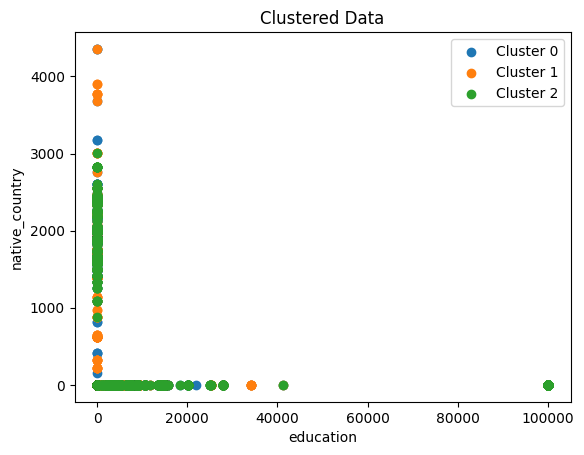

In [ ]:
# Add cluster labels to the original dataset
data_with_clusters = pd.DataFrame(df, columns=[' capital-gain', ' capital-loss'])
data_with_clusters['Cluster'] = cluster_labels
# Explore data within each cluster
for cluster_id in range(3):
    cluster_data = data_with_clusters[data_with_clusters['Cluster'] == cluster_id]

    # Basic statistics for each cluster
    cluster_stats = cluster_data.describe()

    # Visualize the cluster
    plt.scatter(cluster_data[' capital-gain'], cluster_data[' capital-loss'], label=f'Cluster {cluster_id}')

    # Print cluster statistics
    print(f"Cluster {cluster_id} Statistics:")
    print(cluster_stats)
    print("\n")

# Plot the data points with cluster colors
plt.legend()
plt.title('Clustered Data')
plt.xlabel('education')
plt.ylabel('native_country')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have defined a sparse matrix 'X' and 'cluster_labels'...

# Convert the sparse matrix 'X' to a dense NumPy array
X_dense = X.toarray()

silhouette_avg = silhouette_score(X_dense, cluster_labels)
davies_bouldin = davies_bouldin_score(X_dense, cluster_labels)

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")


Silhouette Score: 0.4583415658986553
Davies-Bouldin Index: 0.7950633299442845


In [ ]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.7, min_samples=5).fit(X)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 183
Estimated number of noise points: 946
